## Data Science in Marketing Domain
Question and problems that may need solving in a marketing domain
1. how did the marketing campaign perform? <br>
Marekting campaigns are anything that is done to promote a product.   
2. How are different marketing channels performing? <br>
should we continue investing in a certain marketing channel?
3. A/B testing? <br>
what exactly is it? how is it used in the real world?? Impact based on a certain change??   
analyze a marketing campaig by channel based on A/B test results.   


In [1]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### steps as you Import your dataset
1. import correctly your dataset
2. use the .head()
3. used the .describe() <br> check for ouliers (if min or max is much larger than median.
4. use .info() <br> check for missing values and misreported datatypes
<br>
check if there are any discripances and well as missing values and handle them according to your objectives.

In [2]:
# importing the "marketing" dataset
markets = pd.read_csv('marketing.csv', parse_dates = ['date_subscribed', 
                                                      'date_canceled'])
# parse the dates later

In [3]:
markets.head(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [4]:
markets.shape

(10037, 12)

In [5]:
markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  object        
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 941.1+ KB


There are some columns with dates. let us check if they are stored as datetime dtatype

In [6]:
print(markets['date_served'].dtype)
print(markets['date_subscribed'].dtype)
print(markets['date_canceled'].dtype)

object
datetime64[ns]
datetime64[ns]


In [7]:
# alternatively we can change the columns above after inporting them by
markets['date_served'] = pd.to_datetime(markets['date_served'])
print(markets['date_served'].dtype)

datetime64[ns]


some columns have null values so lets be sure.   
Also we need to check for **duplicate** values

In [8]:
# comment out and run line by line.

#markets.isna().any()
markets.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [9]:

print(markets['converted'].dtype)
# changing "converted" column to "bool"
markets['converted'] = markets['converted'].astype('bool')
print(markets['converted'].dtype)

object
bool


In [10]:
# Identifying if asset is a house ad or not
markets['is_house_ad'] = np.where(markets['marketing_channel'] == 'House Ads', True, False)
print(markets[["is_house_ad", "marketing_channel"]].tail(5))
# switch between head() and tail()

       is_house_ad marketing_channel
10032        False             Email
10033        False             Email
10034        False         Instagram
10035        False             Email
10036        False          Facebook


In [11]:
print(markets['is_house_ad'].dtype)

bool


In [12]:
print(markets['marketing_channel'].unique())

['House Ads' 'Push' 'Facebook' 'Instagram' 'Email' nan]


To change the different categories in 'marketing_channel' column to numerical category, we first create a dictionary that holds the category as keys and their numerical equivalent as values and then

In [13]:
# creating dictionary
channel_dict = {'House Ads' : 1, 'Push' : 2, 'Facebook' : 3, 
               'Instagram' : 4, 'Email' : 5}

In [14]:
# creating new column
markets['channel_code'] = markets['marketing_channel'].map(channel_dict)

In [15]:
print(markets['channel_code'].head(5))

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64


Remember our columns that are in datetime dtype? well let's create a new column that extracts the days of the week, months of the year and even year for a paricular datetime column markets['date_served']

In [16]:
markets['week_ser'] = markets['date_served'].dt.dayofweek

In [17]:
print(markets['week_ser'].head(5))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: week_ser, dtype: float64


In [18]:
print(markets['week_ser'].dtype)

float64


In [19]:
 #markets['week_ser'] = markets['week_ser'].astype('int')

### Aggregating columns with .groupby()

In [20]:
# aggregate unique users that see ads by date
daily_users = markets.groupby(['date_served'])['user_id'].nunique()

daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

In [21]:
type(daily_users)

pandas.core.series.Series

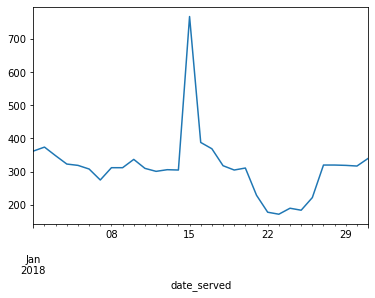

In [22]:
# plotting daily users
daily_users.plot()
plt.show()

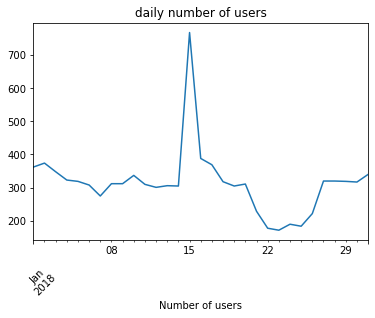

In [23]:
daily_users.plot()

# annotate
plt.title('daily number of users')
plt.xlabel('Date')
plt.xlabel('Number of users')
plt.xticks(rotation = 45)

plt.show()

### Solving problems with marketing data
1. was this campaign successful?
<br> 
Campaign success id typically measured by conversion rate. That means of all the people that heard or saw your campaign, how many bought the product? it could mean a subscription or a purchase e.t.c
2. customer retention
<br>
all users that are subscribed or that use the service regularly. Are they still there after a certain time frame? example 90 day retention rate.
<br>

3. customer segemntation <br>
segemnting means breaking down metrics by specific charateristics.
- conversion rate by age group <br>
we can look at the conversion rate but based on specific characteristics


Conversion rate = number of people who convert / total number of people marketed to

In [24]:
markets.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'is_house_ad', 'channel_code', 'week_ser'],
      dtype='object')

In [25]:
# total number of people who converted
subscribers = markets[markets['converted'] == True]['user_id'].nunique()
subscribers

1030

In [26]:
# total number of people marketed to
total = markets['user_id'].nunique()
total

7309

In [27]:
# calculation conversion rate
conv_rate = subscribers/total
print(conv_rate)
# convert to percentage
conv_rate_percent = round(conv_rate * 100, 2)
print(str(conv_rate_percent) + ' %')

0.14092215077301956
14.09 %


retention rate = number of people who remain subscribed / total number who converted <br>
one month retention would be the number who remain subscribed after a month over the total number

In [28]:
# customers that remained subscribed over a month
# column 'is_retained has already been provided'
retained = markets[markets['is_retained'] == True]['user_id'].nunique()
retained

678

In [29]:
# the total number of subscribers has already been calculated above
retention = round((retained/subscribers) * 100, 2)
print(str(retention) + ' %')

65.83 %


for a retention rate for "house ads", subset only house ads and then calculate the retention rate as you normally woukd

In [30]:
house_ads_subset = markets[markets['subscribing_channel'] == 'House Ads']
house_ads_subset.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,channel_code,week_ser
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0


use the above 'house ad subset' to calculate the retention rate and conversio rate for only users exposed to house ads <br>
however, for this, all subscribing channels have to have their rates checked and then all retention rates compared to see the best and the same for the conversion rate. <br>
but this is tedious so we use the .groupby() method to make it a lot easier


In [31]:
retained_grp = markets[markets['is_retained'] == True].groupby(['subscribing_channel']
                                                              )['user_id'].nunique()
retained_grp

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [32]:
subscribers_grp = markets[markets['converted'] == True].groupby(['subscribing_channel']
                                                               )['user_id'].nunique()
subscribers_grp

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [33]:
channel_retention_rate = (retained_grp/subscribers_grp) * 100
channel_retention_rate

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64

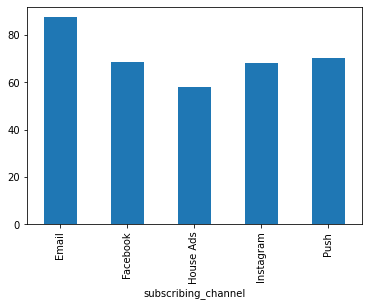

In [34]:
# creating a bar chart on channel retention
channel_retention_rate.plot(kind = 'bar')
plt.show()

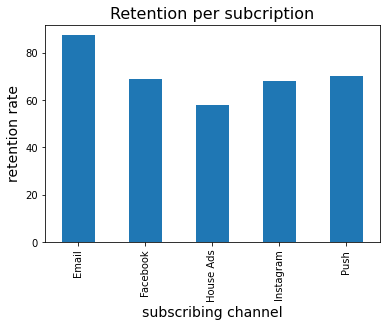

In [35]:
channel_retention_rate.plot(kind = 'bar')

# annotation
plt.title('Retention per subcription', size = 16)
plt.xlabel('subscribing channel', size = 14)
plt.ylabel('retention rate', size = 14)

plt.show()

`

grouping by language displayes

In [37]:
lan_grp = markets.groupby(['language_displayed'])['user_id'].nunique()
lan_grp

language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64

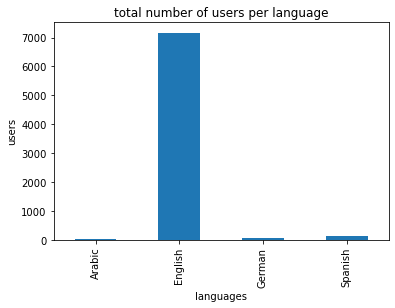

In [38]:
lan_grp.plot(kind = 'bar')
plt.title('total number of users per language')
plt.xlabel('languages')
plt.ylabel('users')
plt.show()

Calculating daily retention rate

In [39]:
total_date = markets.groupby(['date_subscribed'])['user_id'].nunique()
print(total_date.shape)
total_date.head(3)

(31,)


date_subscribed
2018-01-01    36
2018-01-02    37
2018-01-03    37
Name: user_id, dtype: int64

In [40]:
# subsetting the users that are retained (is_retained == true)
retained_date = markets[markets['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()
print(retained_date.shape)
retained_date.head(3)

(31,)


date_subscribed
2018-01-01    28
2018-01-02    26
2018-01-03    27
Name: user_id, dtype: int64

In [41]:
daily_retention_rate = retained_date/total_date
daily_retention_rate.head(3)

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
Name: user_id, dtype: float64

In [42]:
markets.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'is_house_ad', 'channel_code', 'week_ser'],
      dtype='object')

Simple cohort analysis to evaluate the quality of subscribers per day 
<br>
if the values increase over time then it could mean that the company is getting better at retaining customers that are intrested in the products or that the onboarding process in improving (as soon as users subscribe)

In [43]:
# converting datly_retention_rate to a dataframe and reseting the index
daily_ren_rate = pd.DataFrame(daily_retention_rate).reset_index()
daily_ren_rate.head(3)

,date_subscribed,user_id
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730


In [44]:
# changing the column names
daily_ren_rate.columns = ['date_subscribed', 'retention_rate']
daily_ren_rate.head(3)

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730


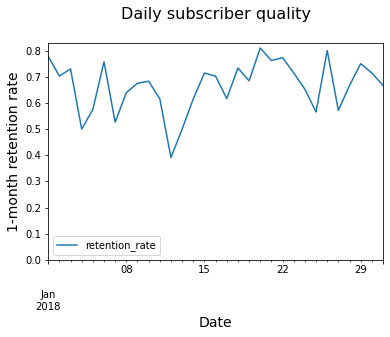

In [45]:
# plotting the graph of the daily_ren_rate

daily_ren_rate.plot('date_subscribed', 'retention_rate')

#annotations
plt.title('Daily subscriber quality\n', size = 16) 
# the \n makes it so that there is a little gap between the title and the chart
plt.xlabel('Date', size = 14)
plt.ylabel("1-month retention rate", size = 14)
# make y axis begin at 0
plt.ylim(0)

plt.show()

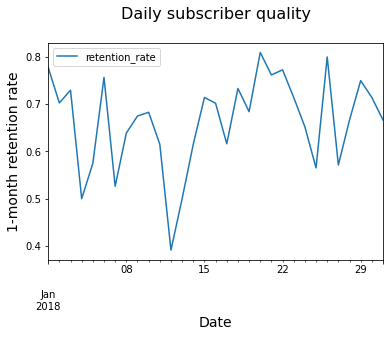

In [46]:
# plotting the graph of the daily_ren_rate

daily_ren_rate.plot('date_subscribed', 'retention_rate')

#annotations
plt.title('Daily subscriber quality\n', size = 16) 
# the \n makes it so that there is a little gap between the title and the chart
plt.xlabel('Date', size = 14)
plt.ylabel("1-month retention rate", size = 14)

plt.show()
# without make the chart start from zero in the y axis